In [51]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display
import csv
import scipy.signal

import DSP_algorithms

# STFT solver tests

### Simple solver test with sine wave

Number of frames: 61
signal_shape: (8000,)
STFT matrix shape: (129, 61)


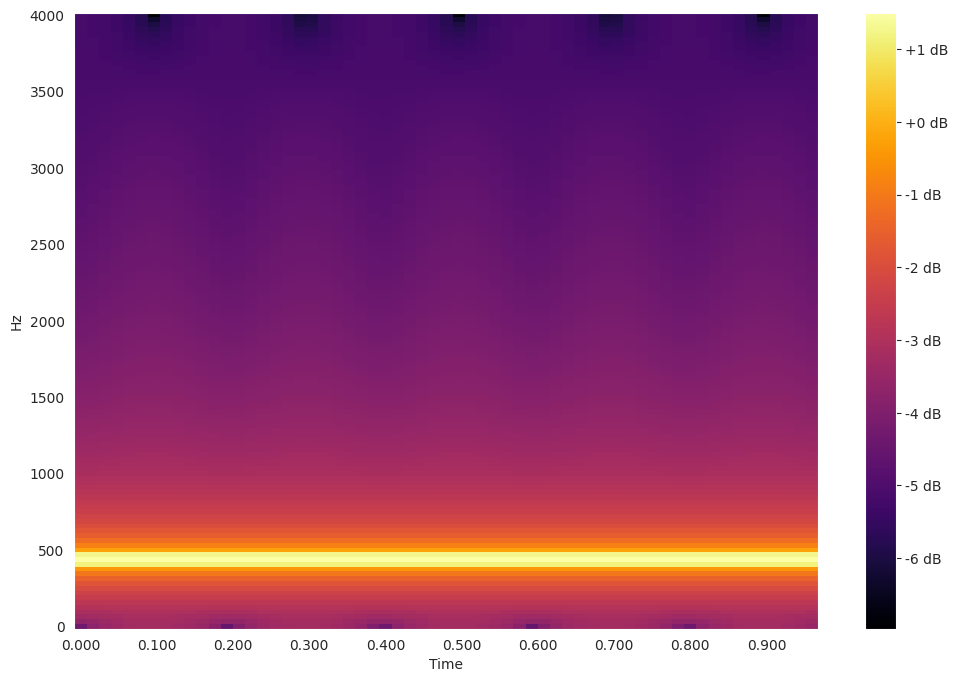

In [52]:
fs = 8000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1-second time vector
signal = 0.5 * np.sin(2 * np.pi * 440 * t)  # A 440 Hz sine wave

window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(signal, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

Number of frames: 63
left_padding: 96
right_padding: 96
signal_shape: (8192,)
STFT matrix shape: (129, 63)


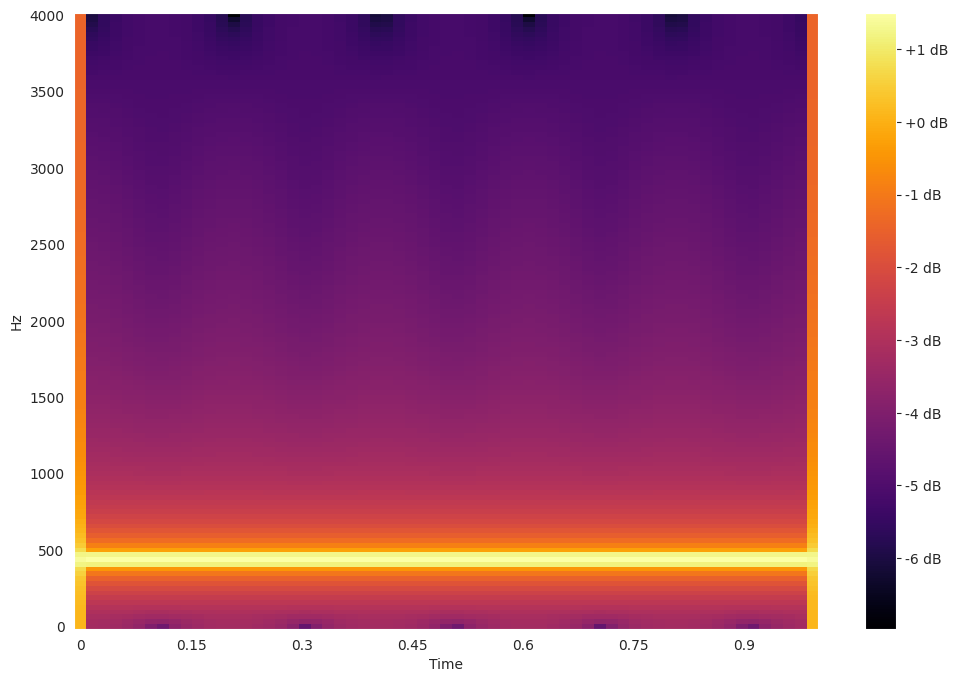

In [53]:
stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(signal, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', padding=True, verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### Simple Librosa test with sine wave

Librosa STFT matrix shape: (129, 63)


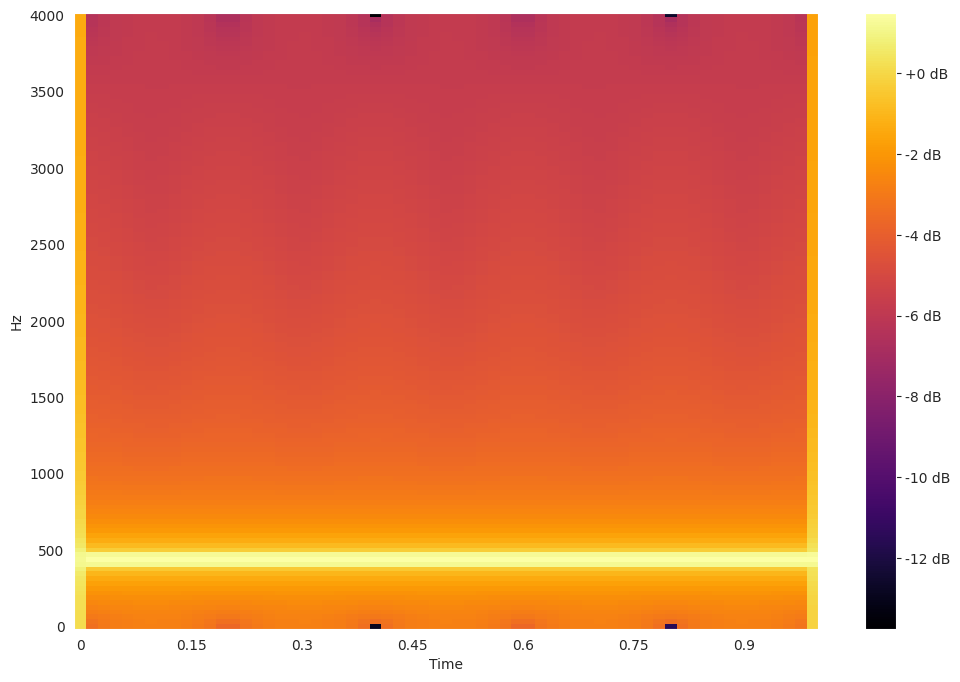

In [54]:
librosa_stft_matrix = librosa.stft(signal, n_fft=window_size, hop_length=hop_size, window='hann')

print(f"Librosa STFT matrix shape: {librosa_stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(librosa_stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### Getting real data from CSV file

In [55]:
data = []
with open("../Data_acquisition/data/audio/8kHz_sampling/unknown_fs=8kHz_1.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric

data = np.array(data, dtype=np.float32)
print(f"Data length before resampling: {len(data)}")
print(f"Data type before resampling: {type(data[0])}")
display.Audio(data, rate=8000)

Data length before resampling: 8000
Data type before resampling: <class 'numpy.float32'>


In [56]:
# for sample in data:
#     print(sample)

In [57]:
resampled_data = librosa.resample(data, orig_sr=8e3, target_sr=48e3)
print(f"Data length after resampling: {len(resampled_data)}")
print(f"Data type after resampling: {type(resampled_data[0])}")
display.Audio(resampled_data, rate=48000)

Data length after resampling: 48000
Data type after resampling: <class 'numpy.float32'>


In [58]:
# for sample in resampled_data:
#     print(sample)

## Using original data

### STFT for real data using implemented solver

Number of frames: 61
signal_shape: (8000,)
STFT matrix shape: (129, 61)


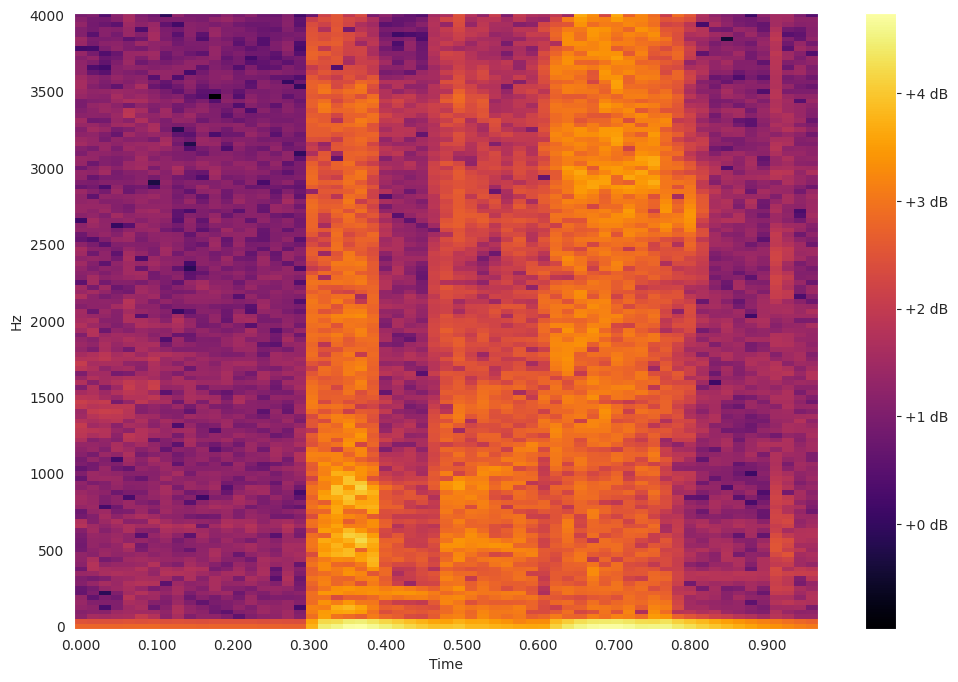

In [59]:
fs = 8e3
window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(data, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

Number of frames: 63
left_padding: 96
right_padding: 96
signal_shape: (8192,)
STFT matrix shape: (129, 63)


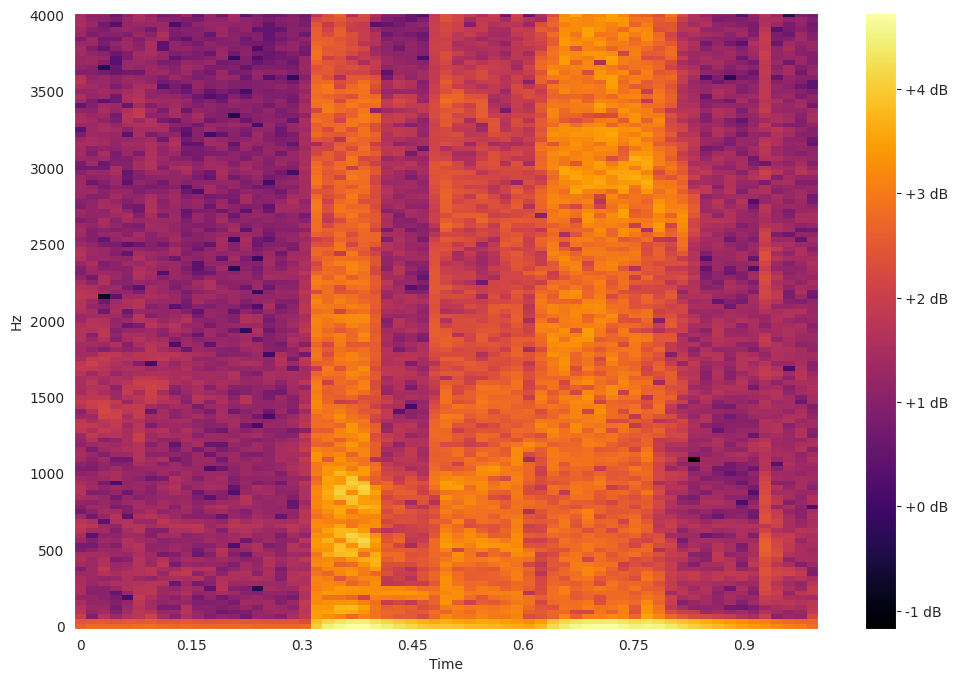

In [60]:
stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(data, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', padding=True, verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### STFT for real data using Librosa solver

Librosa STFT matrix shape: (129, 63)


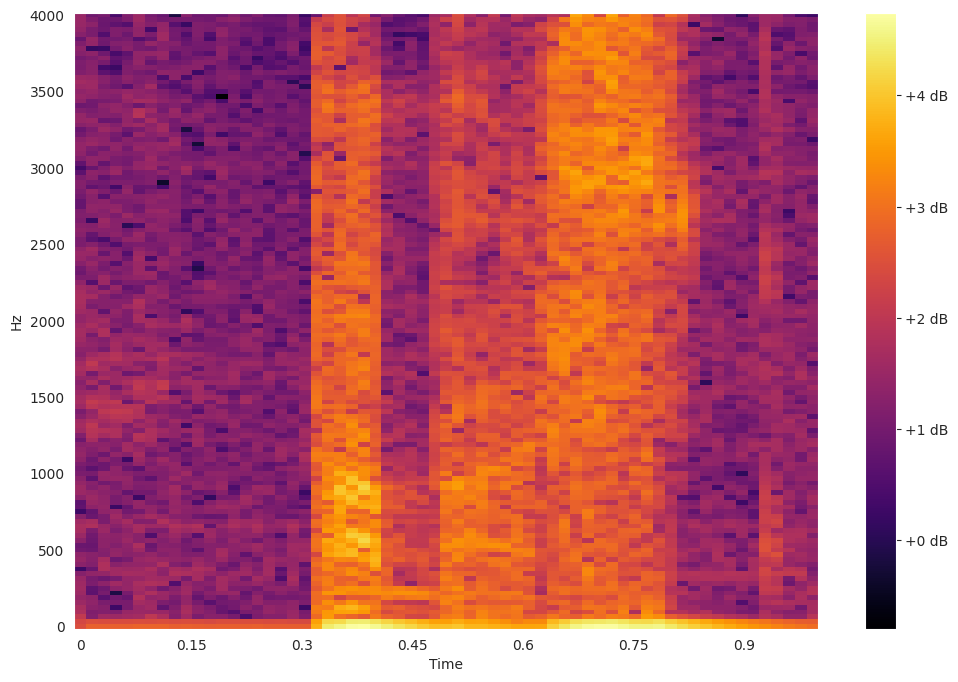

In [61]:
librosa_stft_matrix = librosa.stft(data, n_fft=window_size, hop_length=hop_size, window='hann')

print(f"Librosa STFT matrix shape: {librosa_stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(librosa_stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

## Using resampled data

### STFT for real data using implemented solver

Number of frames: 374
signal_shape: (48000,)
STFT matrix shape: (129, 374)


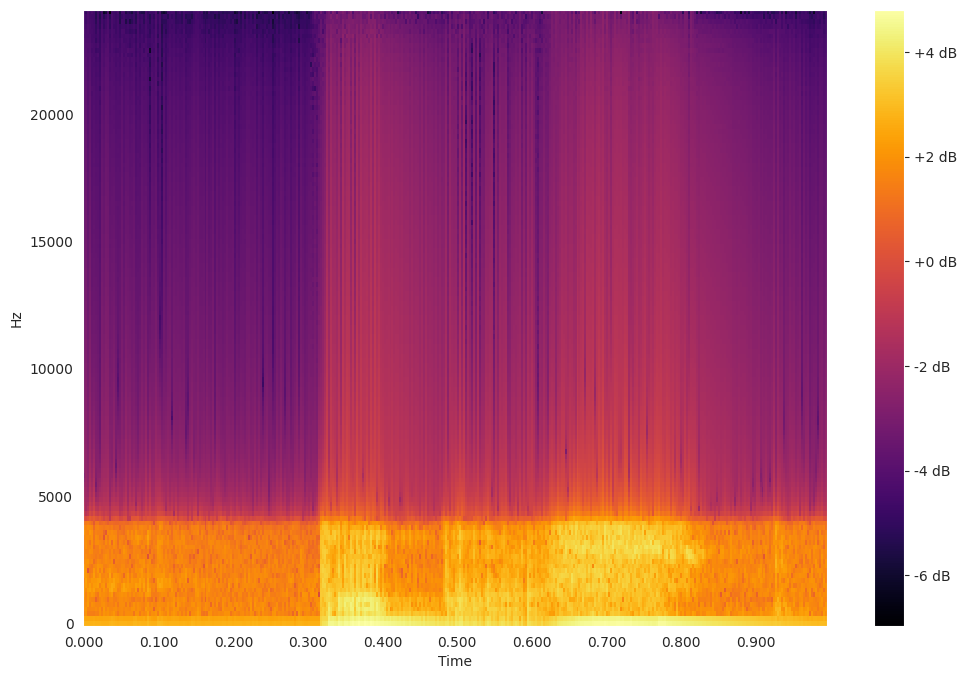

In [62]:
fs = 48e3
window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(resampled_data, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

Number of frames: 375
left_padding: 64
right_padding: 64
signal_shape: (48128,)
STFT matrix shape: (129, 375)


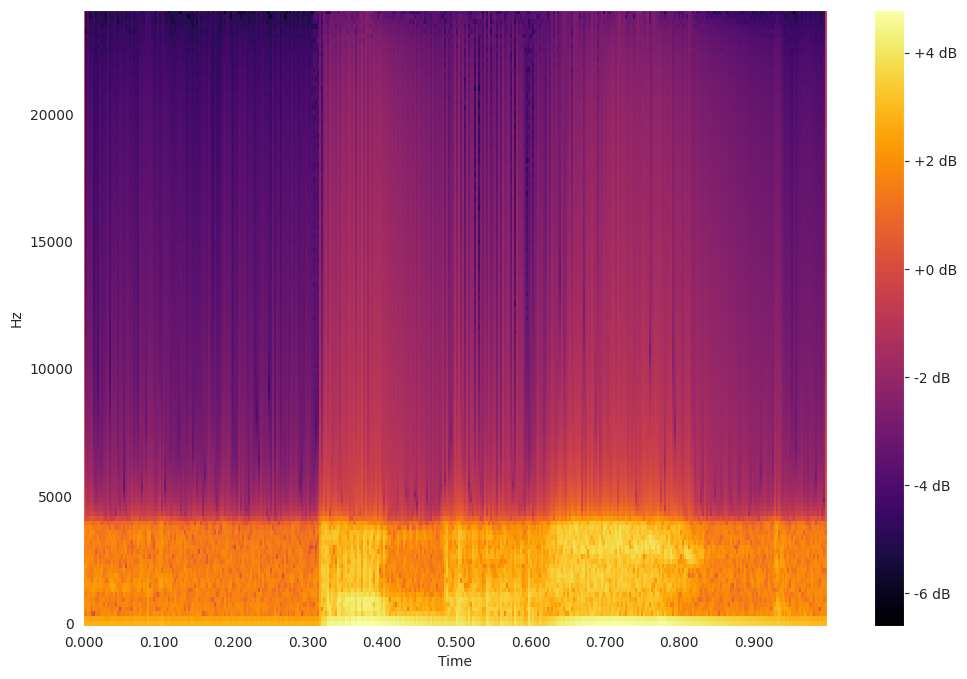

In [63]:
stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(resampled_data, fs=fs, N=window_size, hop_size=hop_size, window_type='hann', padding=True, verbose=True)

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### STFT for real data using Librosa solver

Librosa STFT matrix shape: (129, 376)


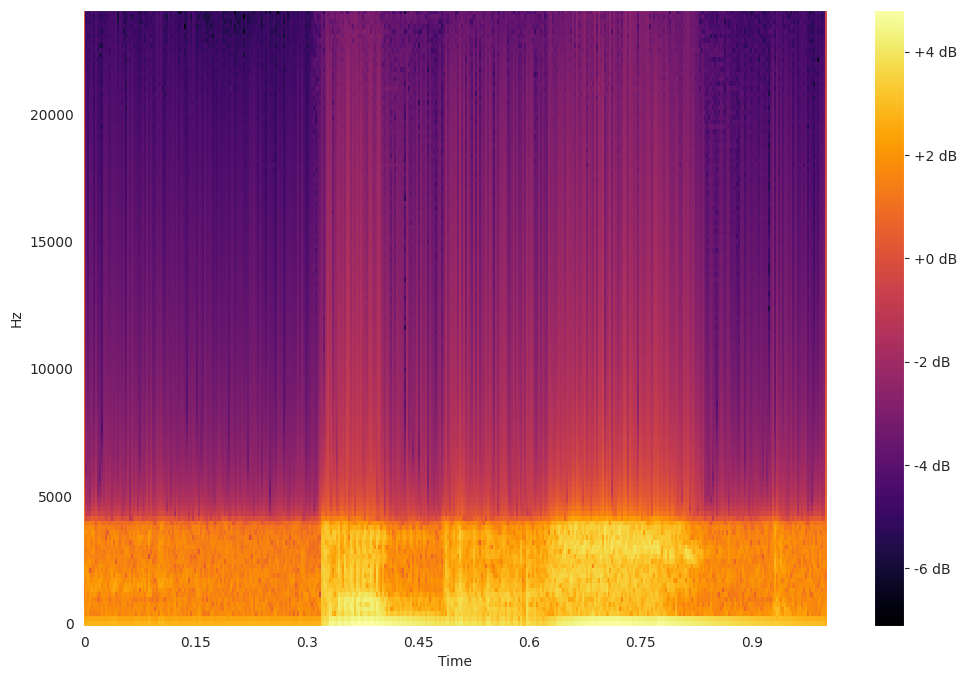

In [64]:
librosa_stft_matrix = librosa.stft(resampled_data, n_fft=window_size, hop_length=hop_size, window='hann')

print(f"Librosa STFT matrix shape: {librosa_stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(librosa_stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

# STFT solver with spectrum reducing

In [65]:
def stft_with_band_limiting(signal_data, fs_signal, N_output, fs_output, hop_size_output, fmin):
    """
    Calculates STFT, limits spectrum to target band and adjusts the number of buckets in the spectrum.

    Parameters:
        signal_data (ndarray): Input signal in time domain.
        fs (int): Sampling rate of the input signal (Hz).
        n_buckets (int): Number of buckets in the target spectrum.
        f_min (float): Lower limit frequency of the spectrum (Hz).
        hop_size (int): Offset of subsequent time windows in samples.
        window_size (int) (optional): Window size in samples (by default twice hop_size).

    Returns:
        reduced_spectrogram (ndarray): Reduced spectrum, ready to be used in a neural network.
        frequencies (ndarray): Frequencies corresponding to target spectrum buckets.

    """
    N_input = int(np.ceil((fs_signal/fs_output)*N_output))
    hop_size_input = int(np.ceil((fs_signal/fs_output)*hop_size_output))



    window = np.hanning(N_input)
    num_frames = (len(signal_data) - N_input) // hop_size_input + 1

    print(f"Num_frames: {num_frames}")
    print(f"hop_size_input: {hop_size_input}")
    print(f"N_input: {N_input}")
    print(N_input // 2 + 1)
    print(int(num_frames))

    # Preallocate STFT matrix
    stft_matrix = np.zeros((N_input // 2 + 1, num_frames), dtype=np.complex128)

    for i in range(num_frames):
        start_idx = i * hop_size_input
        end_idx = start_idx + N_input
        frame = signal_data[start_idx:end_idx] * window

        # Compute FFT and take the positive frequencies
        stft_matrix[:, i] = np.fft.rfft(frame)

    # Calculate frequencies for rfft
    frequencies = np.fft.rfftfreq(N_input, d=1/fs_signal)

    # Bins indexes for final bandwidth
    idx_min = np.searchsorted(frequencies, fmin, side="left")
    idx_max = min(idx_min + N_output, len(frequencies))

    band_limited_stft_matrix = stft_matrix[idx_min:idx_max, :]

    time_frames = np.arange(num_frames) * hop_size_input / fs_signal

    return band_limited_stft_matrix, frequencies[idx_min:idx_max], time_frames

Num_frames: 61
hop_size_input: 768
N_input: 1536
769
61
STFT matrix shape: (256, 61)


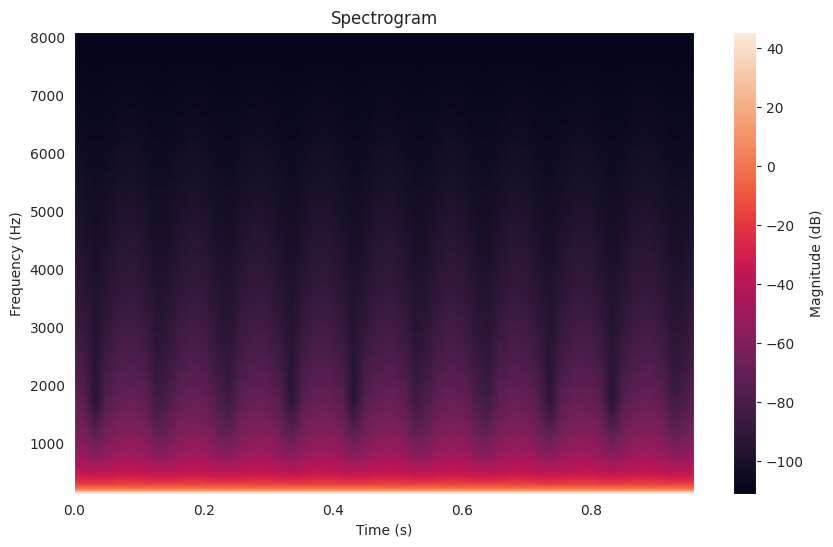

In [66]:
fs_signal = 48e3
fs_output = 8e3
N_output = 256
hop_size_output = 128
f_min = 120
signal_frequency = 120

t = np.linspace(0, 1, int(fs_signal), endpoint=False)  # 1-second time vector
signal = 0.5 * np.sin(2 * np.pi * signal_frequency * t)  # sine wave

stft_matrix, freq_bins, time_frames = stft_with_band_limiting(signal, fs_signal=fs_signal, N_output=N_output, fs_output=fs_output, hop_size_output=hop_size_output, fmin=f_min)

print(f"STFT matrix shape: {stft_matrix.shape}")

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_frames, freq_bins, 20 * np.log10(np.abs(stft_matrix)), shading='gouraud')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

Num_frames: 61
hop_size_input: 768
N_input: 1536
769
61
STFT matrix shape: (256, 61)


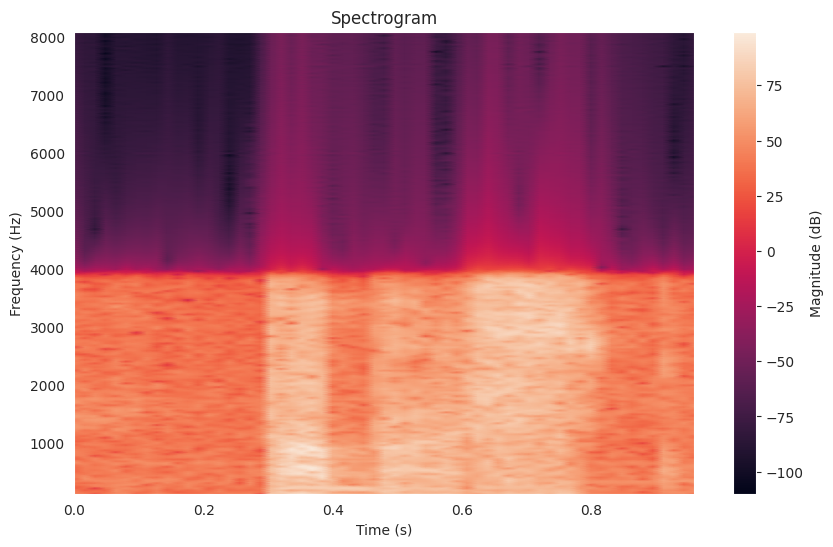

In [67]:
fs_signal = 48e3
fs_output = 8e3
N_output = 256
hop_size_output = 128
f_min = 120

stft_matrix, freq_bins, time_frames = stft_with_band_limiting(resampled_data, fs_signal=fs_signal, N_output=N_output, fs_output=fs_output, hop_size_output=hop_size_output, fmin=f_min)

print(f"STFT matrix shape: {stft_matrix.shape}")

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_frames, freq_bins, 20 * np.log10(np.abs(stft_matrix)), shading='gouraud')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

# STFT highpass filter tests
### Function windows tests

In [68]:
spectrum_edge_bins_number = 4
print(scipy.signal.windows.triang(spectrum_edge_bins_number*2)[0:spectrum_edge_bins_number])
print(np.hamming(spectrum_edge_bins_number*2)[0:spectrum_edge_bins_number])
print(np.hanning(spectrum_edge_bins_number*2)[0:spectrum_edge_bins_number])
print(np.blackman(spectrum_edge_bins_number*2)[0:spectrum_edge_bins_number])

[0.125 0.375 0.625 0.875]
[0.08       0.25319469 0.64235963 0.95444568]
[0.         0.1882551  0.61126047 0.95048443]
[-1.38777878e-17  9.04534244e-02  4.59182958e-01  9.20363618e-01]


### STFT highpass filter solvers tests

STFT matrix shape: (129, 61)

STFT_filter_mask:
[1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
 1.16977778e-01 4.13175911e-01 7.50000000e-01 9.69846310e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.0000

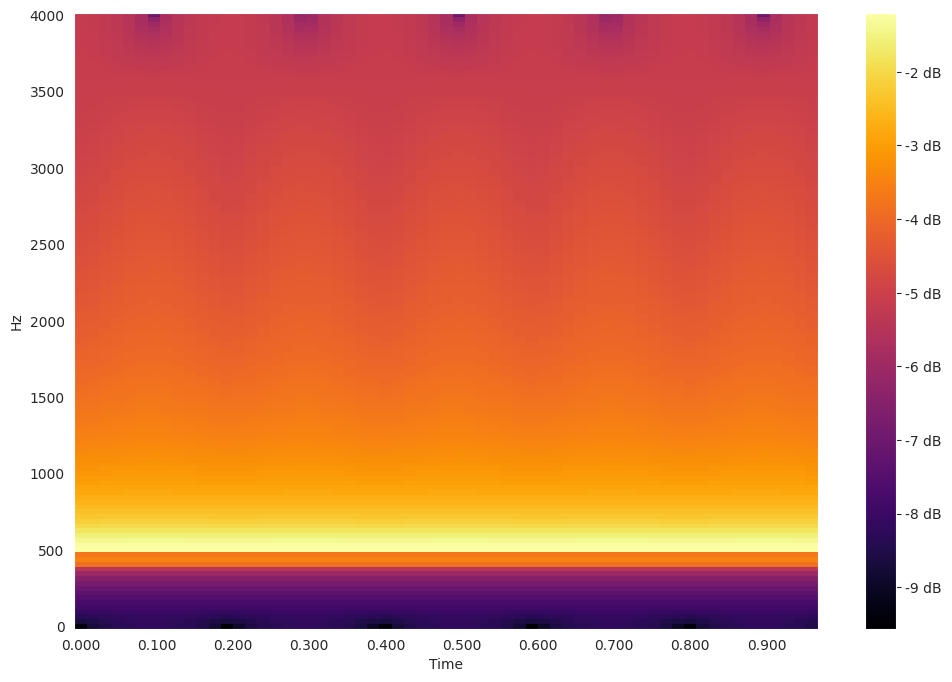

In [69]:
fs = 8000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1-second time vector
signal = 0.5 * np.sin(2 * np.pi * 440 * t)  # A 440 Hz sine wave

window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(signal, fs=fs, N=window_size, hop_size=hop_size, window_type='hann')

print(f"STFT matrix shape: {stft_matrix.shape}\n")

f_zero = 440
f_pass = 620
minimum_transmittance = 1e-5

stft_filter_mask = DSP_algorithms.get_highpass_stft_filter_mask(mask_length=stft_matrix.shape[0], fs=fs, f_pass=f_pass,
                                                                f_zero=f_zero,
                                                                minimum_transmittance=minimum_transmittance,
                                                                window_type='hann')
print(f"STFT_filter_mask:\n{stft_filter_mask}\n")

filtered_stft_matrix = DSP_algorithms.highpass_stft_filter(stft_matrix, stft_filter_mask)
print(f"STFT filtered matrix vector:\n{abs(filtered_stft_matrix[:, 1])}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(filtered_stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

STFT matrix shape: (129, 61)

STFT_filter_mask:
[0.001      0.1882551  0.61126047 0.95048443 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     

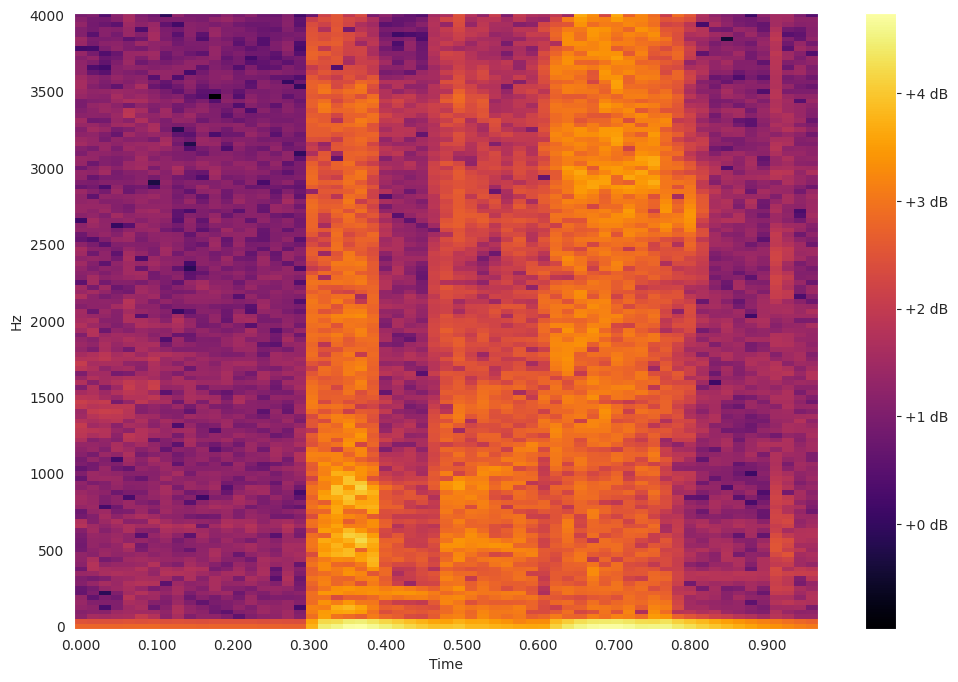




After filtering


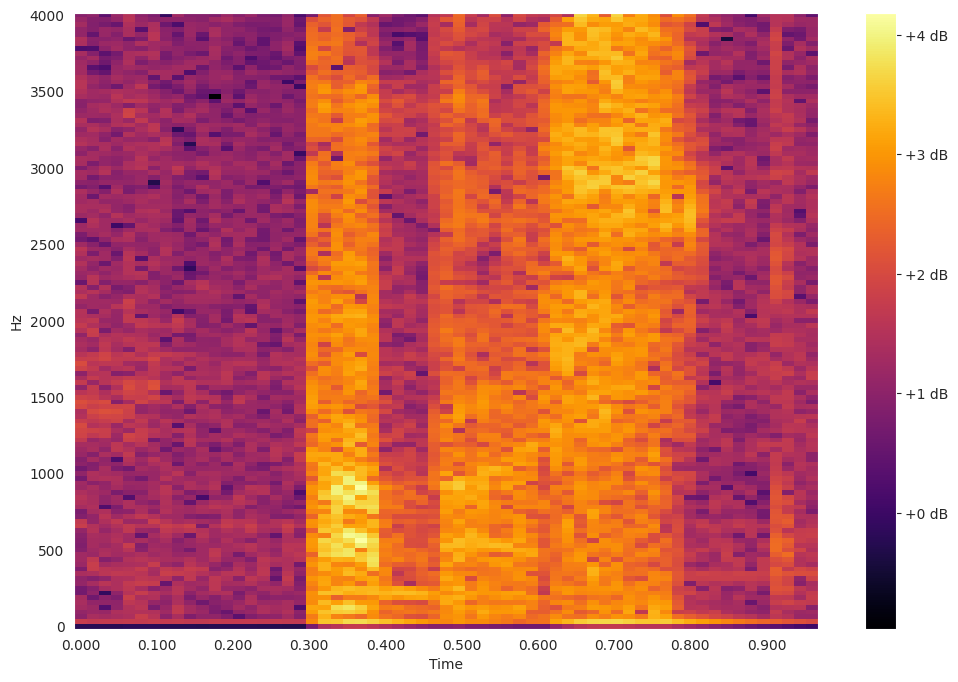

In [70]:
fs = 8000  # Sampling frequency
window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = DSP_algorithms.stft(data, fs=fs, N=window_size, hop_size=hop_size, window_type='hann')

print(f"STFT matrix shape: {stft_matrix.shape}\n")

f_zero = 0
f_pass = 120
minimum_transmittance = 1e-3

stft_filter_mask = DSP_algorithms.get_highpass_stft_filter_mask(mask_length=stft_matrix.shape[0], fs=fs, f_pass=f_pass,
                                                                f_zero=f_zero,
                                                                minimum_transmittance=minimum_transmittance,
                                                                window_type='hann')
print(f"STFT_filter_mask:\n{stft_filter_mask}\n")
print(f"STFT matrix vector:\n{abs(stft_matrix[:, 1])}")

filtered_stft_matrix = DSP_algorithms.highpass_stft_filter(stft_matrix, stft_filter_mask)
print(f"STFT filtered matrix vector:\n{abs(filtered_stft_matrix[:, 1])}")

print("\n\n\nBefore filtering")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

print("\n\n\nAfter filtering")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(filtered_stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()